0 = not spam, 1 = spam


POLY

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



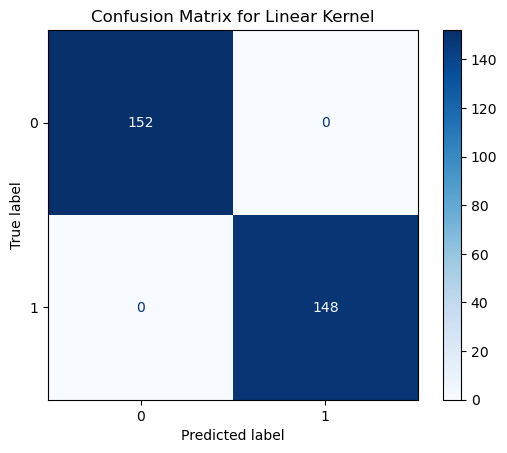



SIGMOID

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



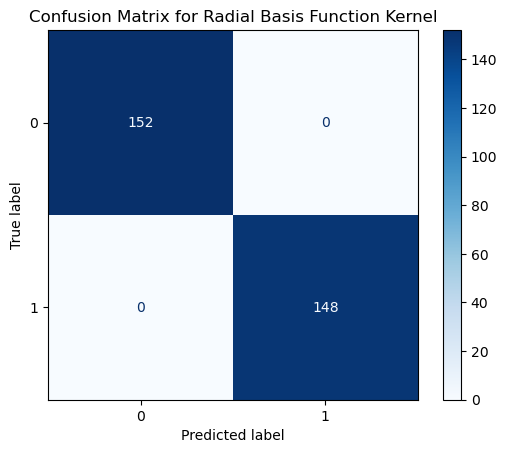

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('spam_dataset.csv')

tfidf = TfidfVectorizer(stop_words='english')
messages = df['message_content'].tolist()
X = tfidf.fit_transform(messages)
y = df['is_spam'].tolist()

# Splitting data using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='poly', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('0 = not spam, 1 = spam\n\n')

print('POLY\n')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Linear Kernel')
plt.show()

model = SVC(kernel='sigmoid', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('\n\nSIGMOID\n')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Radial Basis Function Kernel')
plt.show()